In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('Interpolation/InterpolatedDenWeekCHKP.csv')

In [63]:
df

,DATES,D Revenue,U CR,D OE,U NOI,U CAPEX,U WK,D FCF
0,2017-01-01,21.295168,4.397002,9.741060,0.601510,1.187499,41.300368,41.634225
1,2017-01-08,21.267300,4.376040,9.625893,0.601510,1.199967,40.822951,41.634225
2,2017-01-15,21.239432,4.355077,9.510726,0.601510,1.212434,40.345534,41.634225
3,2017-01-22,21.211563,4.334114,9.395558,0.601510,1.224901,39.868117,41.634225
4,2017-01-29,21.183695,4.313152,9.280391,0.601510,1.237368,39.390700,41.634225
...,...,...,...,...,...,...,...,...
179,2020-06-07,16.981135,3.022363,9.228734,1.687462,1.251128,78.031368,22.755420
180,2020-06-14,16.801093,3.054082,9.207408,1.690932,1.254413,78.031368,22.682751
181,2020-06-21,16.621050,3.085802,9.186083,1.694402,1.257697,78.031368,22.610083
182,2020-06-28,16.441008,3.117521,9.164757,1.697872,1.260982,78.031368,22.537414


In [64]:
df["D FCF"].mean()

26.993028771050216

In [65]:
dataset = df.values

In [66]:
dataset

array([['2017-01-01', 21.2951680954691, 4.39700223095777, ...,
        1.1874992531326, 41.300367681979104, 41.63422503945971],
       ['2017-01-08', 21.267299815563398, 4.376039611182114, ...,
        1.1999665210157278, 40.82295067164215, 41.63422503945971],
       ['2017-01-15', 21.239431535657697, 4.35507699140646, ...,
        1.2124337888988554, 40.345533661305204, 41.63422503945971],
       ...,
       ['2020-06-21', 16.62105048043256, 3.0858017596884264, ...,
        1.2576972862637017, 78.0313677839758, 22.610082758795386],
       ['2020-06-28', 16.44100837441783, 3.1175211330058032, ...,
        1.2609817100455507, 78.0313677839758, 22.53741425289679],
       ['2020-07-05', 16.2609662684031, 3.14924050632318, ...,
        1.2642661338274, 78.0313677839758, 22.4647457469982]],
      dtype=object)

In [67]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [68]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [69]:
X_scale

array([[0.68677616, 1.        , 0.29350648, 0.        , 0.63027607,
        0.10856074],
       [0.68297432, 0.98737278, 0.27444982, 0.        , 0.65871637,
        0.10020991],
       [0.67917247, 0.97474556, 0.25539316, 0.        , 0.68715667,
        0.09185909],
       ...,
       [0.04912343, 0.21017424, 0.20167474, 0.9936894 , 0.79041166,
        0.75104767],
       [0.02456171, 0.22928099, 0.19814599, 0.9968447 , 0.79790408,
        0.75104767],
       [0.        , 0.24838774, 0.19461724, 1.        , 0.8053965 ,
        0.75104767]])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(147, 6) (18, 6) (19, 6) (147,) (18,) (19,)


In [72]:
from keras.models import Sequential
from keras.layers import Dense

In [73]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(6,)),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(1, activation='elu'),
])

In [74]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [75]:
hist = model.fit(X_train, Y_train,
          batch_size=2, epochs=1500,
          validation_data=(X_val, Y_val))

Train on 147 samples, validate on 18 samples
Epoch 1/1500
147/147 [==============================] - 0s 3ms/step - loss: 9.4875 - val_loss: 7.4033
Epoch 2/1500
147/147 [==============================] - 0s 1ms/step - loss: 6.6231 - val_loss: 6.7554
Epoch 3/1500
147/147 [==============================] - 0s 1ms/step - loss: 6.4428 - val_loss: 6.0930
Epoch 4/1500
147/147 [==============================] - 0s 1ms/step - loss: 6.0590 - val_loss: 8.3735
Epoch 5/1500
147/147 [==============================] - 0s 1ms/step - loss: 6.0446 - val_loss: 5.4910
Epoch 6/1500
147/147 [==============================] - 0s 1ms/step - loss: 5.3269 - val_loss: 3.2080
Epoch 7/1500
147/147 [==============================] - 0s 1ms/step - loss: 4.6151 - val_loss: 3.2836
Epoch 8/1500
147/147 [==============================] - 0s 1ms/step - loss: 3.8734 - val_loss: 1.9746
Epoch 9/1500
147/147 [==============================] - 0s 1ms/step - loss: 3.9306 - val_loss: 3.1670
Epoch 10/1500
147/147 [==============

147/147 [==============================] - 0s 1ms/step - loss: 0.7757 - val_loss: 0.5275
Epoch 81/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.7368 - val_loss: 1.0900
Epoch 82/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.7269 - val_loss: 0.8496
Epoch 83/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.7312 - val_loss: 0.6773
Epoch 84/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.6863 - val_loss: 0.3852
Epoch 85/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.7392 - val_loss: 0.7905
Epoch 86/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.6622 - val_loss: 1.2986
Epoch 87/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.7347 - val_loss: 0.6429
Epoch 88/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.7054 - val_loss: 0.5463
Epoch 89/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.6336 - v

147/147 [==============================] - 0s 1ms/step - loss: 0.5784 - val_loss: 0.4127
Epoch 160/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.5328 - val_loss: 0.3797
Epoch 161/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4998 - val_loss: 0.7053
Epoch 162/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.5533 - val_loss: 0.6180
Epoch 163/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.5417 - val_loss: 0.3809
Epoch 164/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.5221 - val_loss: 0.6084
Epoch 165/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.5607 - val_loss: 0.6461
Epoch 166/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.6135 - val_loss: 0.7847
Epoch 167/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.5677 - val_loss: 0.6072
Epoch 168/1500
147/147 [==============================] - 0s 1ms/step - loss: 0

Epoch 238/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4290 - val_loss: 0.3437
Epoch 239/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4412 - val_loss: 0.2142
Epoch 240/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4800 - val_loss: 0.5030
Epoch 241/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4446 - val_loss: 0.4315
Epoch 242/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4785 - val_loss: 0.2890
Epoch 243/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4947 - val_loss: 0.6495
Epoch 244/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4455 - val_loss: 0.2206
Epoch 245/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4746 - val_loss: 0.2521
Epoch 246/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.5062 - val_loss: 0.4422
Epoch 247/1500
147/147 [==============================] - 0s 1ms

Epoch 317/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3752 - val_loss: 0.3448
Epoch 318/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4054 - val_loss: 0.5027
Epoch 319/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3737 - val_loss: 0.2018
Epoch 320/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4136 - val_loss: 0.2005
Epoch 321/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3910 - val_loss: 0.4921
Epoch 322/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3678 - val_loss: 0.2398
Epoch 323/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3890 - val_loss: 0.1960
Epoch 324/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4268 - val_loss: 0.4134
Epoch 325/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3954 - val_loss: 0.3635
Epoch 326/1500
147/147 [==============================] - 0s 1ms

Epoch 396/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3708 - val_loss: 0.3431
Epoch 397/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3624 - val_loss: 0.1316
Epoch 398/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3528 - val_loss: 0.1813
Epoch 399/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4030 - val_loss: 0.2935
Epoch 400/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3687 - val_loss: 0.3386
Epoch 401/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3262 - val_loss: 0.3109
Epoch 402/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3412 - val_loss: 0.2288
Epoch 403/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3768 - val_loss: 0.3292
Epoch 404/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3627 - val_loss: 0.4400
Epoch 405/1500
147/147 [==============================] - 0s 1ms

Epoch 475/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3255 - val_loss: 0.1947
Epoch 476/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3239 - val_loss: 0.3588
Epoch 477/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3238 - val_loss: 0.3836
Epoch 478/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3314 - val_loss: 0.3795
Epoch 479/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3431 - val_loss: 0.2485
Epoch 480/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3162 - val_loss: 0.2581
Epoch 481/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3219 - val_loss: 0.3614
Epoch 482/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3609 - val_loss: 0.2913
Epoch 483/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3191 - val_loss: 0.3093
Epoch 484/1500
147/147 [==============================] - 0s 1ms

Epoch 554/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2965 - val_loss: 0.3030
Epoch 555/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3078 - val_loss: 0.1522
Epoch 556/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3036 - val_loss: 0.2221
Epoch 557/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3007 - val_loss: 0.2444
Epoch 558/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3171 - val_loss: 0.2578
Epoch 559/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3128 - val_loss: 0.3594
Epoch 560/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3465 - val_loss: 0.3640
Epoch 561/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3096 - val_loss: 0.1854
Epoch 562/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2975 - val_loss: 0.1855
Epoch 563/1500
147/147 [==============================] - 0s 1ms

Epoch 633/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2836 - val_loss: 0.2153
Epoch 634/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3025 - val_loss: 0.0894
Epoch 635/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2982 - val_loss: 0.5121
Epoch 636/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2846 - val_loss: 0.1823
Epoch 637/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3107 - val_loss: 0.1848
Epoch 638/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2923 - val_loss: 0.2904
Epoch 639/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2913 - val_loss: 0.3667
Epoch 640/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3100 - val_loss: 0.2501
Epoch 641/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3012 - val_loss: 0.2809
Epoch 642/1500
147/147 [==============================] - 0s 1ms

Epoch 712/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2769 - val_loss: 0.2574
Epoch 713/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2725 - val_loss: 0.3261
Epoch 714/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2683 - val_loss: 0.2247
Epoch 715/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.4211 - val_loss: 0.2517
Epoch 716/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.3834 - val_loss: 0.2437
Epoch 717/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2275 - val_loss: 0.2078
Epoch 718/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2698 - val_loss: 0.1320
Epoch 719/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2786 - val_loss: 0.4094
Epoch 720/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2821 - val_loss: 0.3417
Epoch 721/1500
147/147 [==============================] - 0s 1ms

Epoch 791/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2545 - val_loss: 0.3243
Epoch 792/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2741 - val_loss: 0.4000
Epoch 793/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2576 - val_loss: 0.2394
Epoch 794/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2768 - val_loss: 0.1773
Epoch 795/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2261 - val_loss: 0.4527
Epoch 796/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2832 - val_loss: 0.2262
Epoch 797/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2720 - val_loss: 0.1450
Epoch 798/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2616 - val_loss: 0.2266
Epoch 799/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2725 - val_loss: 0.2213
Epoch 800/1500
147/147 [==============================] - 0s 1ms

Epoch 870/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2477 - val_loss: 0.1747
Epoch 871/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2308 - val_loss: 0.2558
Epoch 872/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2504 - val_loss: 0.1363
Epoch 873/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2547 - val_loss: 0.1023
Epoch 874/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2394 - val_loss: 0.2163
Epoch 875/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2612 - val_loss: 0.2296
Epoch 876/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2562 - val_loss: 0.3191
Epoch 877/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2585 - val_loss: 0.2694
Epoch 878/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2420 - val_loss: 0.3278
Epoch 879/1500
147/147 [==============================] - 0s 1ms

Epoch 949/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2415 - val_loss: 0.1637
Epoch 950/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2385 - val_loss: 0.4099
Epoch 951/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2580 - val_loss: 0.1512
Epoch 952/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2126 - val_loss: 0.3011
Epoch 953/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2533 - val_loss: 0.1162
Epoch 954/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2416 - val_loss: 0.2790
Epoch 955/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2353 - val_loss: 0.2179
Epoch 956/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2408 - val_loss: 0.4902
Epoch 957/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2546 - val_loss: 0.1238
Epoch 958/1500
147/147 [==============================] - 0s 1ms

147/147 [==============================] - 0s 1ms/step - loss: 0.2463 - val_loss: 0.1847
Epoch 1028/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2439 - val_loss: 0.1913
Epoch 1029/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2337 - val_loss: 0.2599
Epoch 1030/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2193 - val_loss: 0.2196
Epoch 1031/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2324 - val_loss: 0.1854
Epoch 1032/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2220 - val_loss: 0.1864
Epoch 1033/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2404 - val_loss: 0.2084
Epoch 1034/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2373 - val_loss: 0.1883
Epoch 1035/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2432 - val_loss: 0.0814
Epoch 1036/1500
147/147 [==============================] - 0s 1ms/step 

147/147 [==============================] - 0s 1ms/step - loss: 0.2301 - val_loss: 0.2748
Epoch 1106/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2531 - val_loss: 0.1039
Epoch 1107/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2002 - val_loss: 0.4547
Epoch 1108/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2327 - val_loss: 0.1547
Epoch 1109/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2202 - val_loss: 0.1799
Epoch 1110/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2115 - val_loss: 0.2199
Epoch 1111/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2259 - val_loss: 0.1276
Epoch 1112/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2219 - val_loss: 0.3150
Epoch 1113/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2232 - val_loss: 0.2050
Epoch 1114/1500
147/147 [==============================] - 0s 1ms/step 

147/147 [==============================] - 0s 1ms/step - loss: 0.2233 - val_loss: 0.1888
Epoch 1184/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2175 - val_loss: 0.3440
Epoch 1185/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.1852 - val_loss: 0.2202
Epoch 1186/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2192 - val_loss: 0.2385
Epoch 1187/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2248 - val_loss: 0.2045
Epoch 1188/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2135 - val_loss: 0.2599
Epoch 1189/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2124 - val_loss: 0.2967
Epoch 1190/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2318 - val_loss: 0.3667
Epoch 1191/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2336 - val_loss: 0.1483
Epoch 1192/1500
147/147 [==============================] - 0s 1ms/step 

Epoch 1261/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2125 - val_loss: 0.1138
Epoch 1262/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2233 - val_loss: 0.1478
Epoch 1263/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2122 - val_loss: 0.2191
Epoch 1264/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2175 - val_loss: 0.3094
Epoch 1265/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2222 - val_loss: 0.1182
Epoch 1266/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2336 - val_loss: 0.1425
Epoch 1267/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.1819 - val_loss: 0.2986
Epoch 1268/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2363 - val_loss: 0.1614
Epoch 1269/1500
147/147 [==============================] - 0s 2ms/step - loss: 0.2087 - val_loss: 0.2190
Epoch 1270/1500
147/147 [==============================

147/147 [==============================] - 0s 1ms/step - loss: 0.2116 - val_loss: 0.2111
Epoch 1340/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2090 - val_loss: 0.2768
Epoch 1341/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2038 - val_loss: 0.3881
Epoch 1342/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2201 - val_loss: 0.1750
Epoch 1343/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2107 - val_loss: 0.2827
Epoch 1344/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2117 - val_loss: 0.1749
Epoch 1345/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.1987 - val_loss: 0.1836
Epoch 1346/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2080 - val_loss: 0.1996
Epoch 1347/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2067 - val_loss: 0.3522
Epoch 1348/1500
147/147 [==============================] - 0s 1ms/step 

147/147 [==============================] - 0s 1ms/step - loss: 0.2096 - val_loss: 0.0995
Epoch 1418/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.1775 - val_loss: 0.1957
Epoch 1419/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2098 - val_loss: 0.2114
Epoch 1420/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.1981 - val_loss: 0.1014
Epoch 1421/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2104 - val_loss: 0.4028
Epoch 1422/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.1958 - val_loss: 0.3041
Epoch 1423/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2170 - val_loss: 0.2226
Epoch 1424/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2036 - val_loss: 0.1415
Epoch 1425/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2173 - val_loss: 0.2065
Epoch 1426/1500
147/147 [==============================] - 0s 1ms/step 

147/147 [==============================] - 0s 1ms/step - loss: 0.1975 - val_loss: 0.2643
Epoch 1496/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.1798 - val_loss: 0.2698
Epoch 1497/1500
147/147 [==============================] - 0s 1ms/step - loss: 0.2129 - val_loss: 0.1753
Epoch 1498/1500
147/147 [==============================] - 0s 2ms/step - loss: 0.1864 - val_loss: 0.2583
Epoch 1499/1500
147/147 [==============================] - 0s 2ms/step - loss: 0.2036 - val_loss: 0.1192
Epoch 1500/1500
147/147 [==============================] - 0s 2ms/step - loss: 0.1942 - val_loss: 0.3930


In [76]:
import matplotlib.pyplot as plt

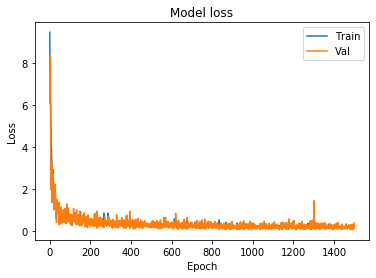

In [77]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [78]:
# serialize model to JSON
model_json = model.to_json()
with open("modelden.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelden.h5")
print("Saved model to disk")

Saved model to disk


In [79]:
import numpy as np
from numpy import array
arr = []
for x in range(len(X_scale)):
    Xnew = array([[X_scale[x][0], X_scale[x][1] , X_scale[x][2], X_scale[x][3], X_scale[x][4], X_scale[x][5]]])
    ynew = model.predict(Xnew)
    #print(ynew[0][0])
    arr.append(ynew[0][0])
array = np.array(arr)

In [80]:
from sklearn.metrics import r2_score
r2_score(Y.tolist(), array.tolist())

0.9965201438563319